In [6]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
columns = ['index', 'ID', 'date', 'query', 'user', 'Text']
tweet = pd.read_csv("ProjectTweets.csv",header=None,names=columns,delimiter=',')
tweet.head(2)

,index,ID,date,query,user,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...


In [7]:
if len(tweet['query'].unique()) <2:
    print("query only has 1 value, dropping query field")
    tweet = tweet[[ 'ID', 'date', 'user','Text']]
    print(tweet.columns)

query only has 1 value, dropping query field
Index(['ID', 'date', 'user', 'Text'], dtype='object')


In [8]:
tweet = tweet.drop_duplicates()
tweet.head(2)

,ID,date,user,Text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...


In [9]:
#To format date
tweet = tweet[['date','Text']]

date_format = "%a %b %d %H:%M:%S PDT %Y"
# Convert to datetime 
tweet['date'] = pd.to_datetime(tweet['date'], format=date_format)
print(tweet['date'])

0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: date, Length: 1598315, dtype: datetime64[ns]


In [10]:
#checking hashtags
import re

def hashtags(tweet):
    hashtags = re.findall(r'#\w+', tweet)
    return hashtags

# Apply the function to the 'tweet' column and flatten the list of hashtags
hashtags_list = tweet['Text'].apply(hashtags).explode()
hashtags_list = hashtags_list.value_counts()
print(f'total hashtag: {len(hashtags_list)}')
hashtags_list[:20] #top 20 hashtags

total hashtag: 13653


#followfriday       2112
#fb                 1744
#squarespace         887
#FF                  586
#1                   519
#seb                 499
#FollowFriday        463
#musicmonday         404
#ff                  399
#iranelection        359
#2                   341
#fail                301
#BSB                 299
#myweakness          269
#iremember           268
#asot400             264
#marsiscoming        248
#mcflyforgermany     230
#andyhurleyday       188
#iPhone              185
Name: Text, dtype: int64

In [11]:
tweet['Text']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: Text, Length: 1598315, dtype: object

In [12]:
def tag(tweet):
    hashtags = re.findall(r'@\w+', tweet)
    return hashtags

# Apply the function to the 'tweet' column and flatten the list of hashtags
tag_list = tweet['Text'].apply(tag).explode()
tag_list = tag_list.value_counts()
print(f'total tag: {len(tag_list)}')
top1000_tag = tag_list[:1000] #top 10 hashtags

total tag: 356113


In [13]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')  # Download the necessary data for NLTK
nltk.download('stopwords')
stemmer = PorterStemmer()
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def cleaning(text):
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    #remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    ##stop words #stemming
    tokens = nltk.word_tokenize(text)
    stemmed_text = ' '.join([stemmer.stem(token) for token in tokens if token not in stop_words ])
    
    return stemmed_text

tweet['Text'] = tweet['Text'].apply(cleaning)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def polarity_Vader(x):
    return sia.polarity_scores(x)["compound"]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...


In [19]:
tweet['score_V'] = tweet['Text'].apply(lambda x: polarity_Vader(x))

In [30]:
tweet['score_V'].describe()

count    1.598315e+06
mean     1.182315e-01
std      4.007151e-01
min     -9.985000e-01
25%      0.000000e+00
50%      0.000000e+00
75%      4.404000e-01
max      9.928000e-01
Name: score_V, dtype: float64

In [31]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598315 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   date     1598315 non-null  datetime64[ns]
 1   Text     1598315 non-null  object        
 2   score_V  1598315 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 48.8+ MB


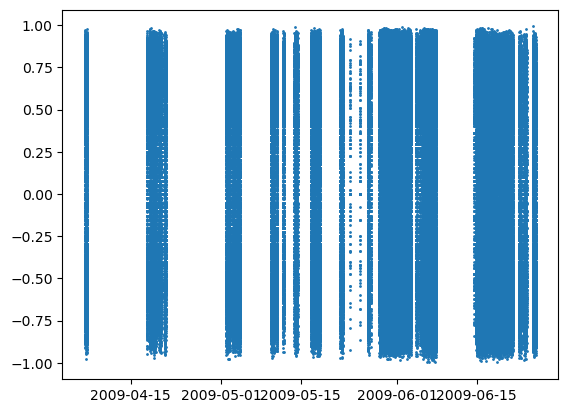

In [32]:
#checking null values in time serie
plt.scatter(tweet['date'], tweet['score_V'], marker='o',s=1)

In [33]:
tweet_2 = tweet.set_index('date')
tweet_2

,Text,score_V
date,,
2009-04-06 22:19:45,httptwitpiccom2y1zl awww that bummer you shoul...,-0.3818
2009-04-06 22:19:49,upset cant updat facebook text might cri resul...,-0.4588
2009-04-06 22:19:53,i dive mani time ball manag save 50 the rest g...,0.4939
2009-04-06 22:19:57,whole bodi feel itchi like fire,0.0258
2009-04-06 22:19:57,behav im mad i cant see,-0.4939
...,...,...
2009-06-16 08:40:49,just woke have school best feel ever,0.6369
2009-06-16 08:40:49,thewdbcom veri cool hear old walt interview â ...,0.3182
2009-06-16 08:40:49,are readi mojo makeov ask detail,0.0000


In [34]:
tweet_2 = tweet_2.groupby(pd.Grouper(freq='H')).mean()

Text(0.5, 1.0, 'Hourly average')

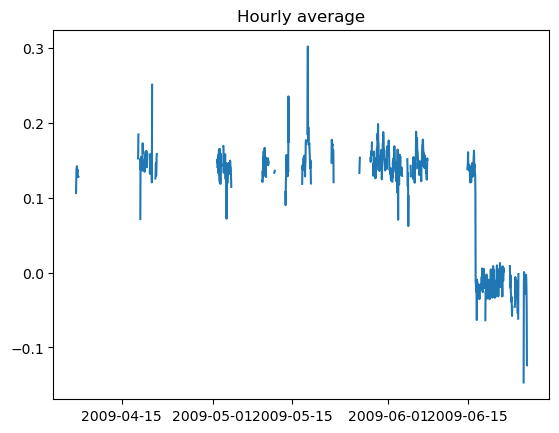

In [35]:
plt.plot(tweet_2.index,tweet_2['score_V'])
plt.title('Hourly average')

Text(0.5, 1.0, 'Daily average')

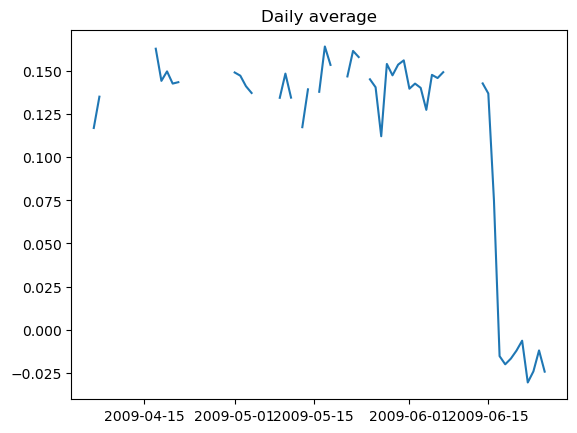

In [36]:
tweet_3 = tweet.set_index('date').groupby(pd.Grouper(freq='D')).mean()
plt.plot(tweet_3.index,tweet_3['score_V'])
plt.title("Daily average")

Text(0.5, 1.0, 'Minute average')

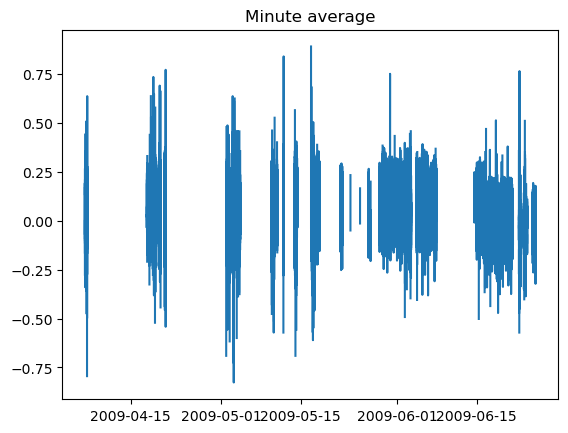

In [37]:
tweet_4 = tweet.set_index('date').groupby(pd.Grouper(freq='T')).mean()
plt.plot(tweet_4.index,tweet_4['score_V'])
plt.title("Minute average")

In [38]:
tweet_5 = tweet.set_index('date').groupby(pd.Grouper(freq='S')).mean()
#can't plot exceed limit

In [39]:
print(f' aggregate by Day percentage of null: {round(tweet_3.score_V.isna().sum()/len(tweet_3),2)}')
print(f' aggregate by Hour percentage of null: {round(tweet_2.score_V.isna().sum()/len(tweet_2),2)}')
print(f' aggregate by Minute percentage of null: {round(tweet_4.score_V.isna().sum()/len(tweet_4),2)}')
print(f' aggregate by Second percentage of null: {round(tweet_5.score_V.isna().sum()/len(tweet_5),2)}')

 aggregate by Day percentage of null: 0.41
 aggregate by Hour percentage of null: 0.69
 aggregate by Minute percentage of null: 0.75
 aggregate by Second percentage of null: 0.89
